In [22]:
import pandas as pd

In [23]:
data = pd.read_csv("datasets/Student Depression Dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [24]:
data.shape

(27901, 18)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [26]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [27]:
data.drop_duplicates(inplace=True)
data.shape

(27901, 18)

In [28]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

## City

In [29]:
city_counts = data["City"].value_counts()

<Axes: xlabel='City'>

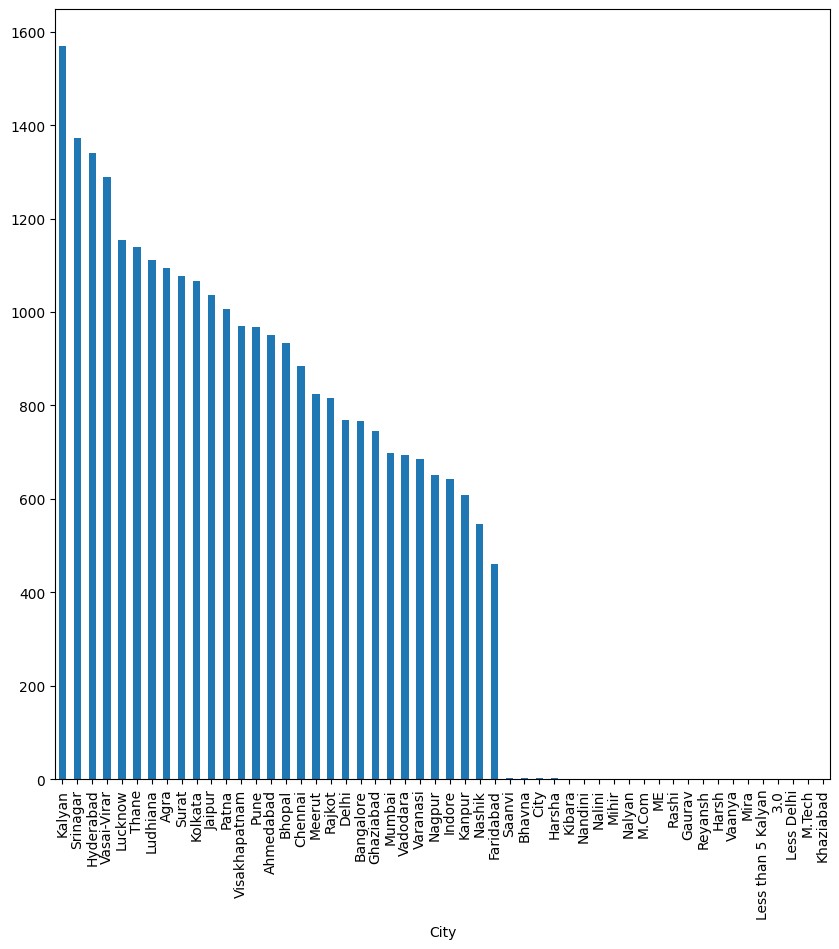

In [30]:
city_counts.plot(kind="bar", figsize=(10, 10))

In [31]:
city_index = {city: i for i, city in enumerate(city_counts[city_counts>5].index)} # 25 datapoints removed

In [32]:
data = data[data["City"].isin(city_index.keys())].reset_index(drop=True)

In [33]:
data.shape

(27875, 18)

## Profession(Drop Column)

<Axes: xlabel='Profession'>

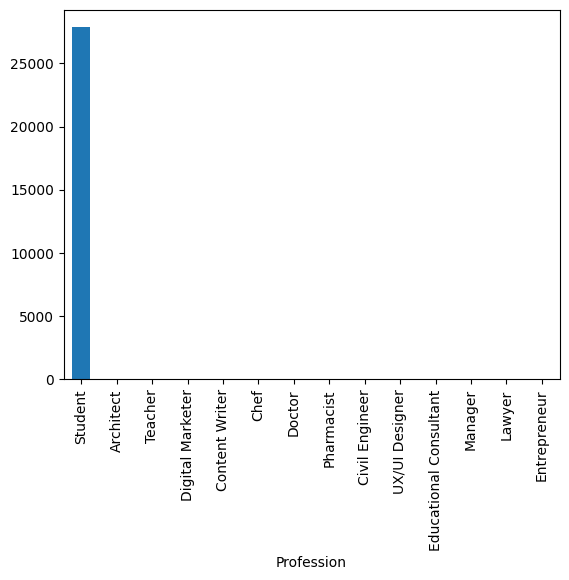

In [34]:
data["Profession"].value_counts().plot(kind="bar")

In [35]:
data = data[data["Profession"]=="Student"]

## Job Satisfaction(Drop Column)

<Axes: xlabel='Job Satisfaction'>

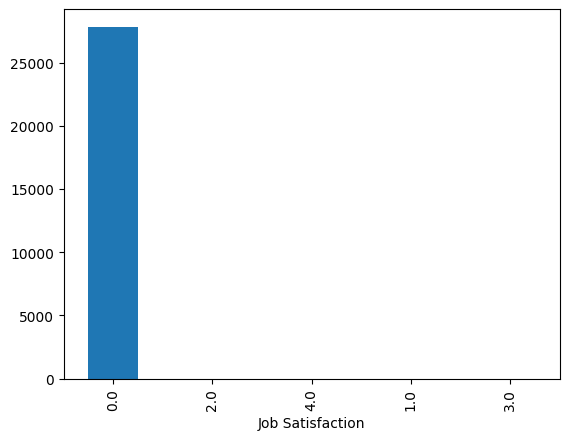

In [36]:
data["Job Satisfaction"].value_counts().plot(kind="bar")

## Sleep Duration

In [37]:
data["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8296
7-8 hours            7327
5-6 hours            6171
More than 8 hours    6032
Others                 18
Name: count, dtype: int64

<Axes: >

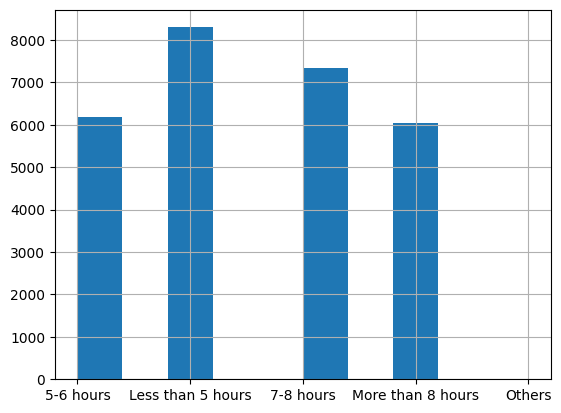

In [38]:
data["Sleep Duration"].hist()

In [39]:
data[data["Sleep Duration"]=="Others"][["Sleep Duration", "Depression"]]

,Sleep Duration,Depression
1963,Others,0
3807,Others,1
3984,Others,1
4534,Others,1
5525,Others,0
5783,Others,1
6736,Others,0
7689,Others,0
7867,Others,0
12922,Others,1


In [40]:
sleep_duration_index = {duration: i for i, duration in enumerate(data["Sleep Duration"].unique())}
sleep_duration_index["Others"] = sleep_duration_index["Less than 5 hours"]

## Dietary Habits

In [41]:
data["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [42]:
data["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10296
Moderate      9904
Healthy       7632
Others          12
Name: count, dtype: int64

<Axes: >

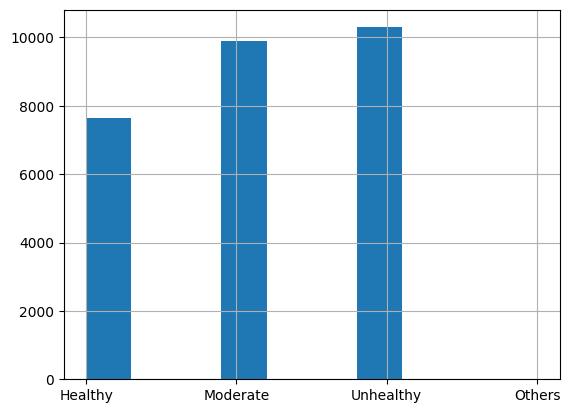

In [43]:
data["Dietary Habits"].hist()

In [44]:
dietary_habits_index = {dhabits: i for i, dhabits in enumerate(data["Dietary Habits"].unique())}
dietary_habits_index["Others"] = dietary_habits_index["Unhealthy"]

## Degree

In [45]:
data["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [46]:
data["Degree"].value_counts()

Degree
Class 12    6075
B.Ed        1861
B.Com       1505
B.Arch      1477
BCA         1430
MSc         1184
B.Tech      1152
MCA         1042
M.Tech      1021
BHM          921
BSc          885
M.Ed         819
B.Pharm      809
M.Com        733
BBA          695
MBBS         694
LLB          670
BE           610
BA           597
M.Pharm      581
MD           568
MBA          561
MA           542
PhD          521
LLM          480
MHM          191
ME           185
Others        35
Name: count, dtype: int64

<Axes: >

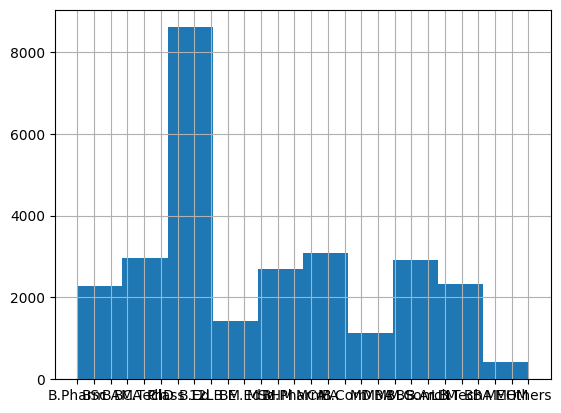

In [47]:
data["Degree"].hist()

In [48]:
degree_index = {degree: i for i, degree in enumerate(data["Degree"].unique())}
degree_index["Others"] = degree_index["Class 12"]

## Have you ever had suicidal thoughts ?


<Axes: >

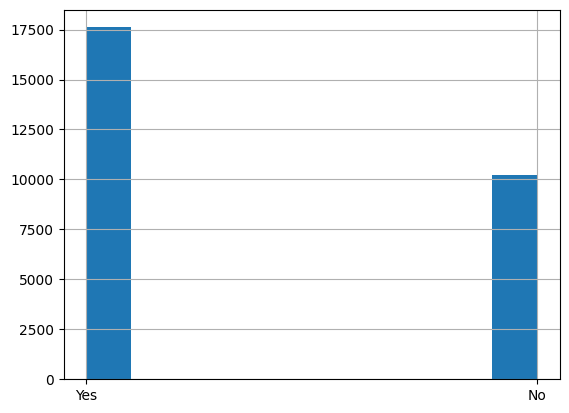

In [49]:
data["Have you ever had suicidal thoughts ?"].hist()

In [50]:
binary_map = {"Yes": 1, "No": 0}

## Family History of Mental Illness?

<Axes: >

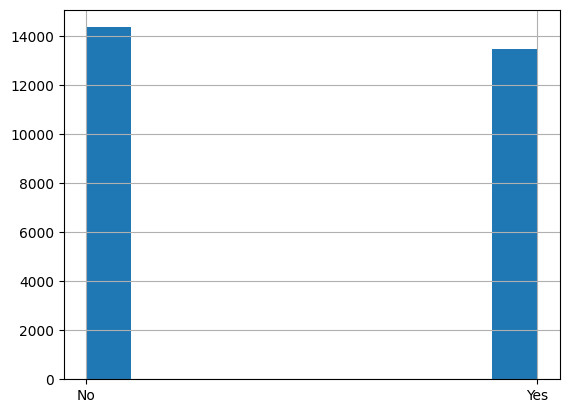

In [51]:
data["Family History of Mental Illness"].hist()

## Work Pressure(drop column)

<Axes: >

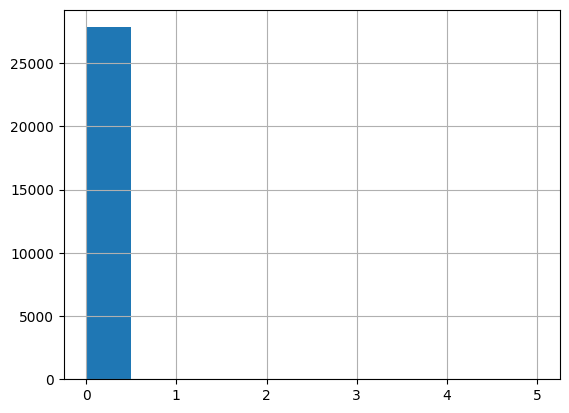

In [52]:
data["Work Pressure"].hist()

# Gender

<Axes: >

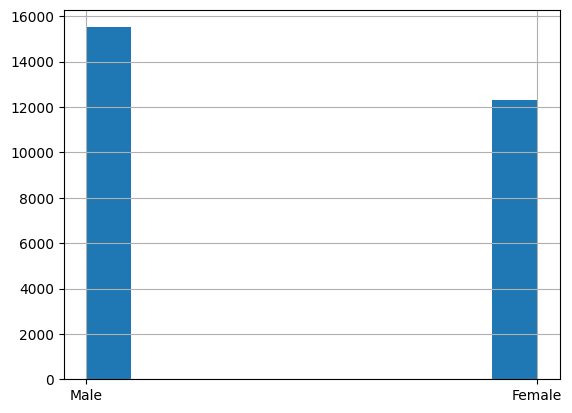

In [53]:
data["Gender"].hist()

In [54]:
gender_index = {"Male": 0, "Female": 1}

## Depression

In [55]:
data["Depression"].value_counts()

Depression
1    16293
0    11551
Name: count, dtype: int64

<Axes: >

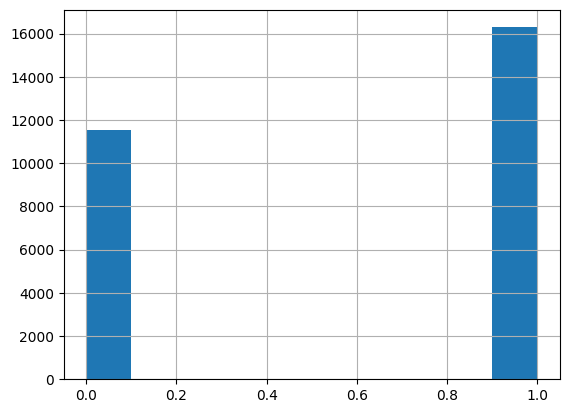

In [56]:
data["Depression"].hist()

## Applying all the transforms to the dataset

In [57]:
data = pd.read_csv("datasets/Student Depression Dataset.csv")

In [58]:
# Categorical Columns Transforms
data["Gender"] = data["Gender"].map(gender_index)
data["City"] = data["City"].map(city_index)
data["Sleep Duration"] = data["Sleep Duration"].map(sleep_duration_index)
data["Dietary Habits"] = data["Dietary Habits"].map(dietary_habits_index)
data["Degree"] = data["Degree"].map(degree_index)
data["Have you ever had suicidal thoughts ?"] = data["Have you ever had suicidal thoughts ?"].map(binary_map)
data["Family History of Mental Illness"] = data["Family History of Mental Illness"].map(binary_map)

# Filtering data
data= data[data["Profession"]=="Student"].reset_index(drop=True)
data = data[data["Job Satisfaction"]==0].reset_index(drop=True)

# Drop unnecessary columns
data.drop(["id", "Profession", "Work Pressure", "Job Satisfaction"], axis=1, inplace=True)

In [59]:
#dropping duplicate rows
data.drop_duplicates(inplace=True)

In [60]:
# dropping NAN
data.dropna(inplace=True)

In [61]:
data.shape

(27833, 14)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data.corr()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,-0.008912,-0.008690,0.022128,-0.036444,0.015740,-0.006421,-0.059902,0.000931,0.001492,-0.013398,0.005172,0.015969,-0.002004
Age,-0.008912,1.000000,-0.001262,-0.076354,0.004488,0.009237,-0.010199,-0.057592,0.197478,-0.113407,-0.032511,-0.095254,-0.004828,-0.226766
City,-0.008690,-0.001262,1.000000,0.005351,-0.001816,0.015498,-0.001983,0.003273,0.004687,-0.007266,-0.000922,-0.014896,0.009685,-0.010746
Academic Pressure,0.022128,-0.076354,0.005351,1.000000,-0.025175,-0.112145,-0.025497,0.089531,-0.038687,0.261860,0.096314,0.151769,0.030243,0.475035
CGPA,-0.036444,0.004488,-0.001816,-0.025175,1.000000,-0.046705,-0.013094,0.001661,-0.000831,0.008264,0.002219,0.006095,-0.004069,0.021736
Study Satisfaction,0.015740,0.009237,0.015498,-0.112145,-0.046705,1.000000,0.007302,-0.020616,-0.034736,-0.083920,-0.036964,-0.064910,-0.003993,-0.168573
Sleep Duration,-0.006421,-0.010199,-0.001983,-0.025497,-0.013094,0.007302,1.000000,0.013050,-0.005554,-0.032313,-0.034143,0.001109,-0.008259,-0.051559
Dietary Habits,-0.059902,-0.057592,0.003273,0.089531,0.001661,-0.020616,0.013050,1.000000,-0.016222,0.113057,0.029693,0.087317,0.004397,0.206985
Degree,0.000931,0.197478,0.004687,-0.038687,-0.000831,-0.034736,-0.005554,-0.016222,1.000000,-0.017095,-0.008538,-0.014623,0.005263,-0.038545
Have you ever had suicidal thoughts ?,0.001492,-0.113407,-0.007266,0.261860,0.008264,-0.083920,-0.032313,0.113057,-0.017095,1.000000,0.121818,0.209456,0.025687,0.546479


In [64]:
sns.__version__

'0.13.2'

Text(0.5, 1.0, 'Correlation Matrix')

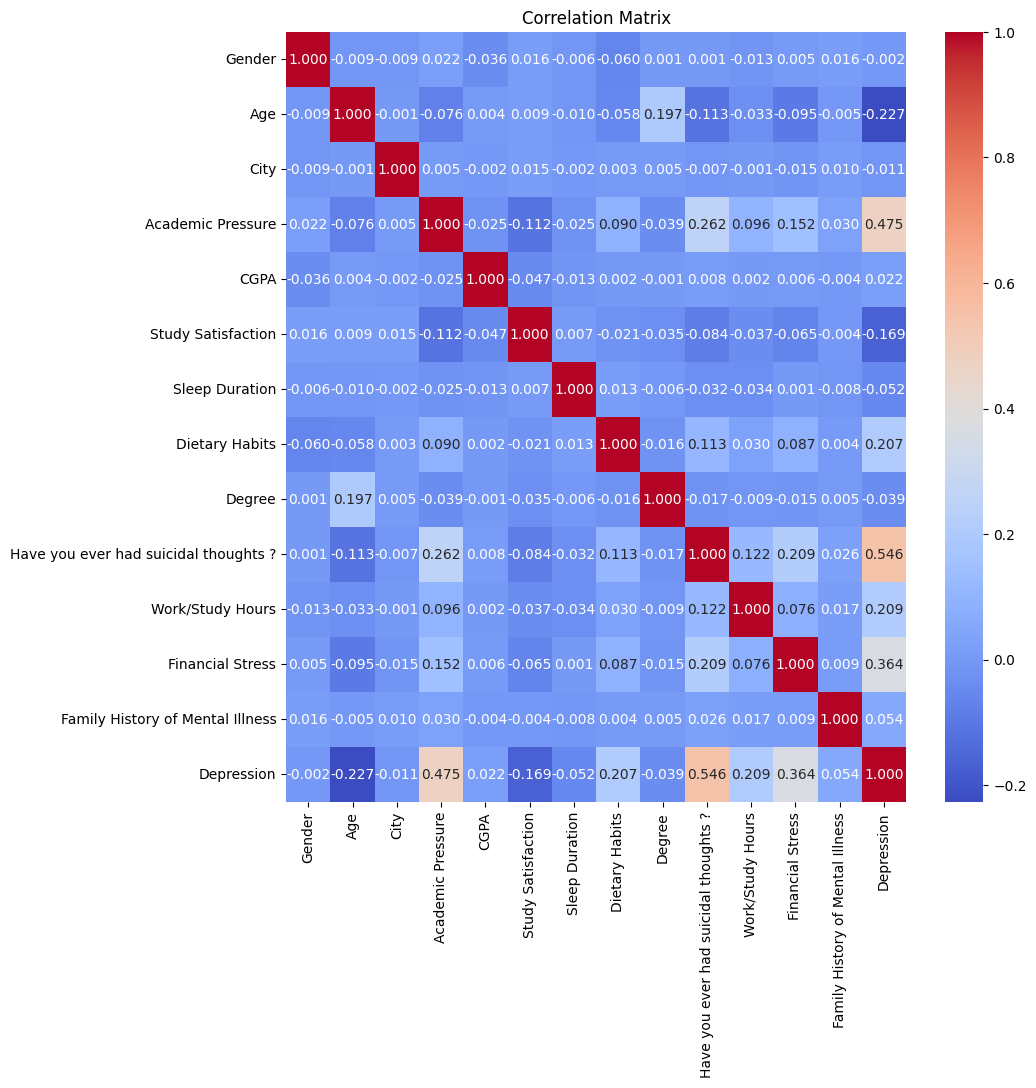

In [65]:
corr = data.corr()
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Matrix")

In [40]:
X = data.drop(["Depression"], axis=1)
y = data["Depression"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## Saving dataset

In [44]:
train.to_csv("datasets/train.csv", index=False)
test.to_csv("datasets/test.csv", index=False)